In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nhập dữ liệu

In [291]:
train_df = pd.read_csv(r'D:\Documents\Đồ án 2\Pricing Problem\Data\train.csv')

In [292]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [293]:
train_df.shape

(1460, 81)

# Dữ liệu null 

In [294]:
count_null = train_df.isnull().sum().sort_values(ascending=False)
percent_null = (count_null/train_df.shape[0])*100
data_null = pd.concat([count_null, percent_null], axis = 1)

In [295]:
data_null

,0,1
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


In [296]:
data_null_real = data_null.loc[data_null[0]>0]
value = data_null_real.iloc[:,0].values
index = np.arange(data_null_real.shape[0])
label = data_null_real.index.values

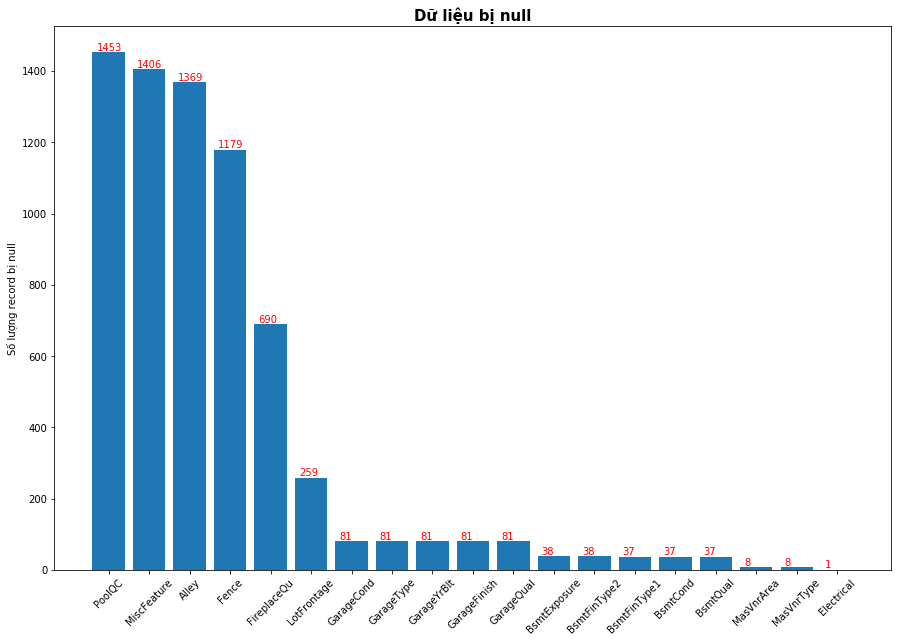

In [297]:
plt.figure(figsize=(15,10))
plt.ylabel("Số lượng record bị null")
plt.title("Dữ liệu bị null", fontsize=15, fontweight='bold')
plt.xticks(index, label, rotation=45)
plt.bar(index, value)
for x,y in zip(index, value):
    plt.text(x-0.3,y+5, str(y), color='red')

In [298]:
data_null.loc[data_null[1]>=40.0]

,0,1
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


# Xóa các cột có số lượng bản ghi bị null lớn hơn 40%

In [299]:
train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [300]:
(train_df.isnull().sum()*100/train_df.shape[0]).sort_values(ascending=False)

LotFrontage      17.739726
GarageFinish      5.547945
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
                   ...    
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
SaleCondition     0.000000
Id                0.000000
Length: 76, dtype: float64

# Xóa các features dữ liệu dạng category bị mất cân bằng dữ liệu

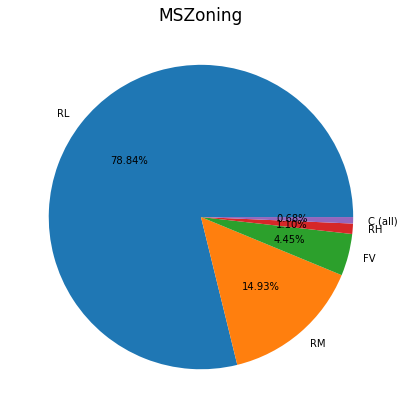

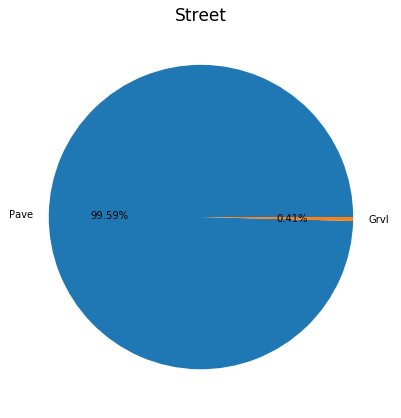

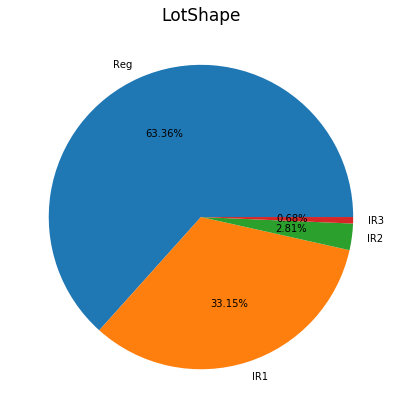

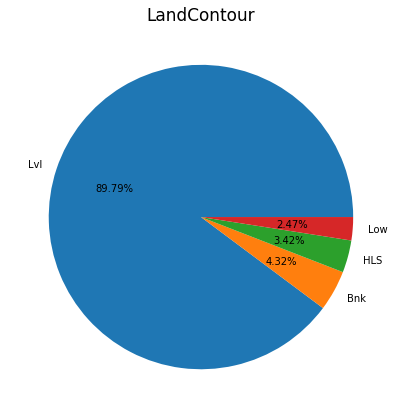

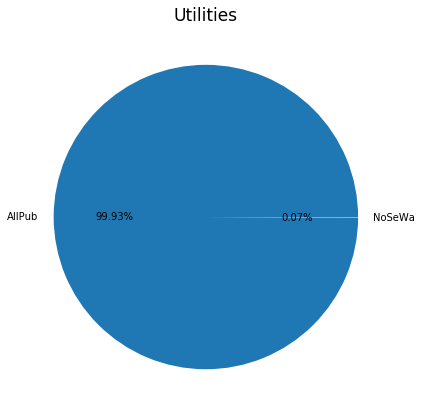

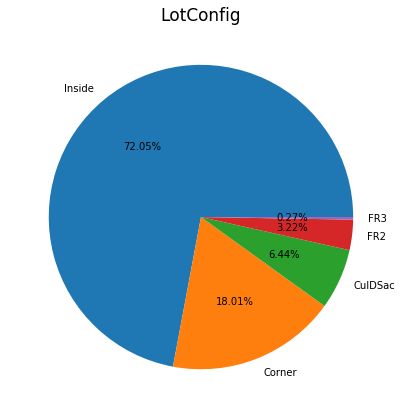

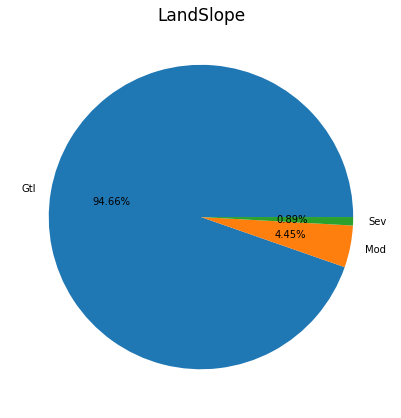

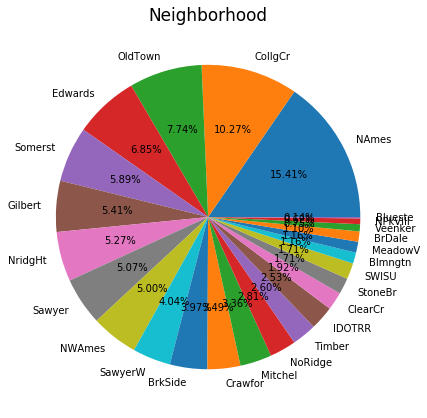

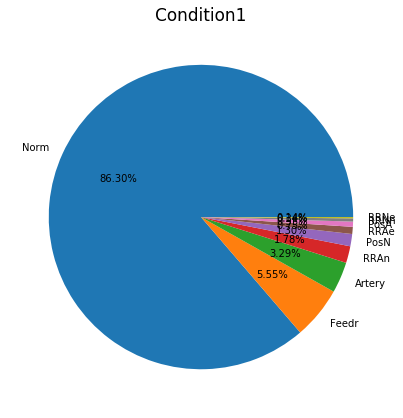

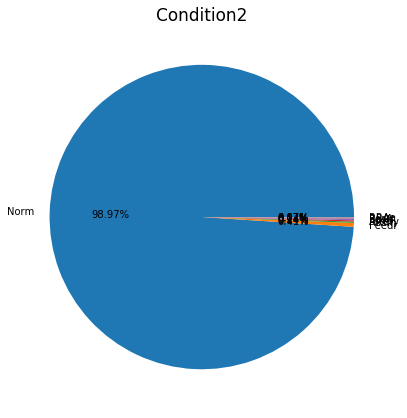

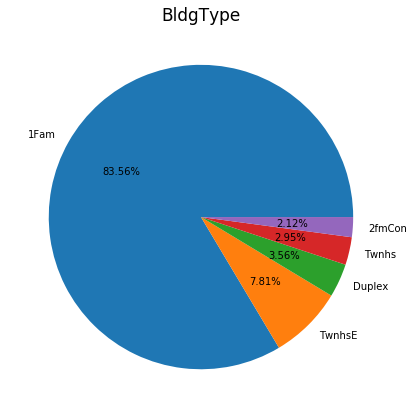

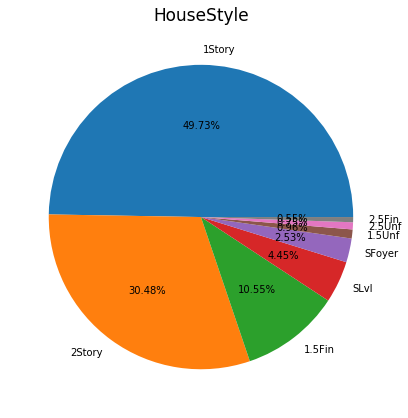

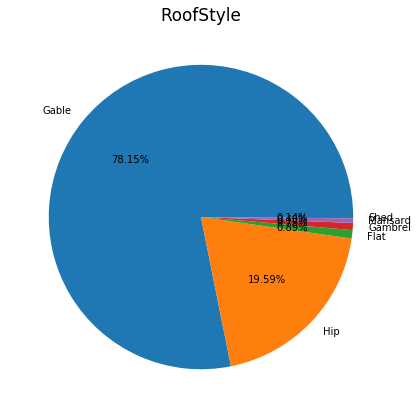

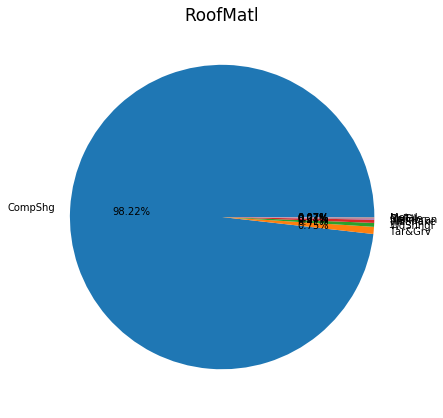

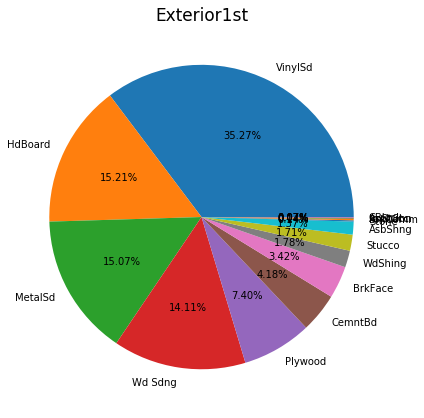

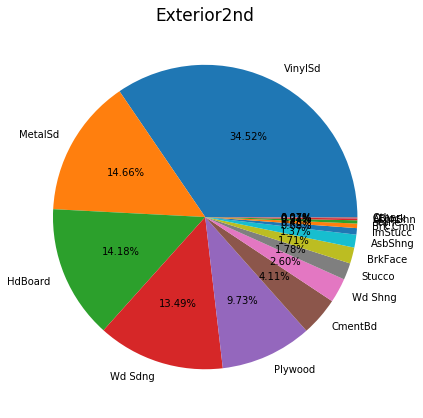

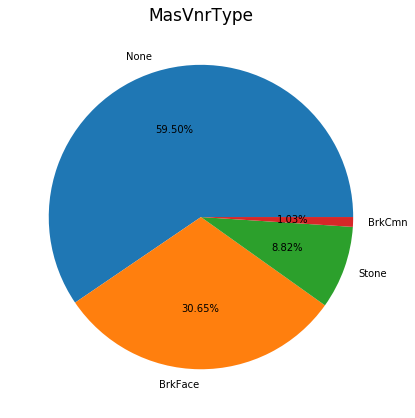

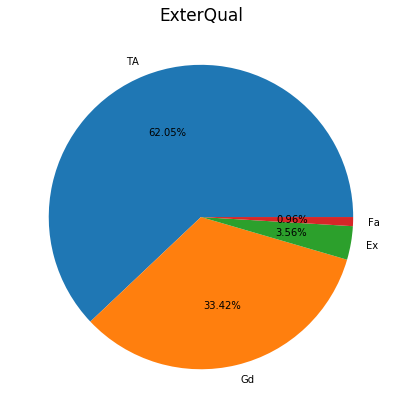

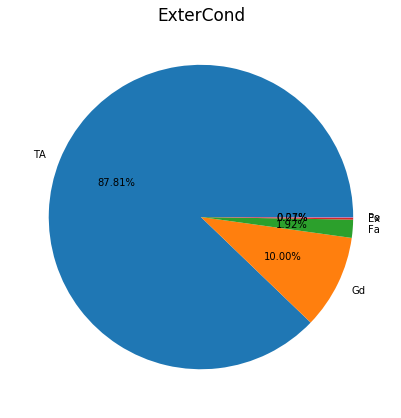

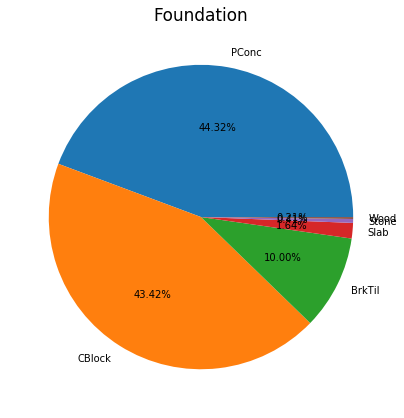

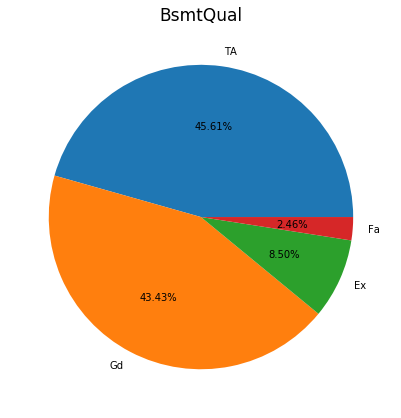

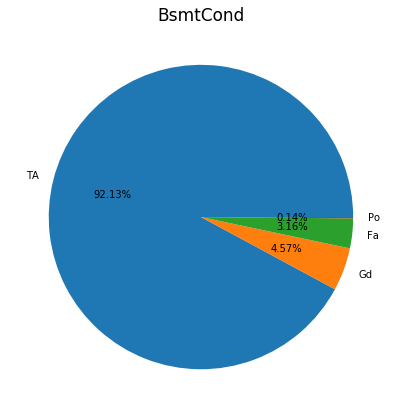

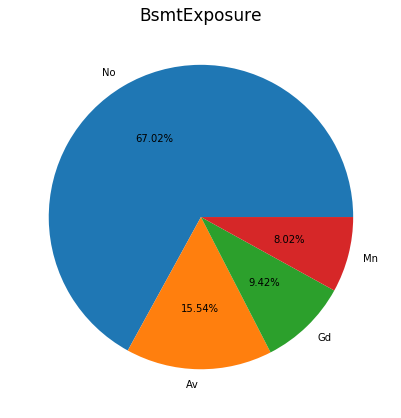

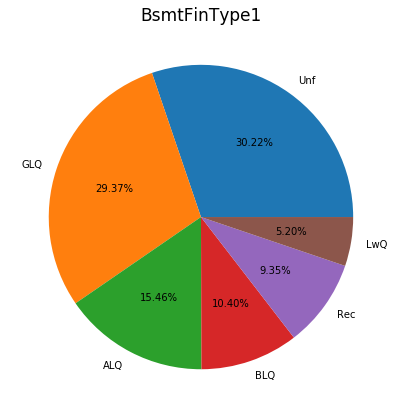

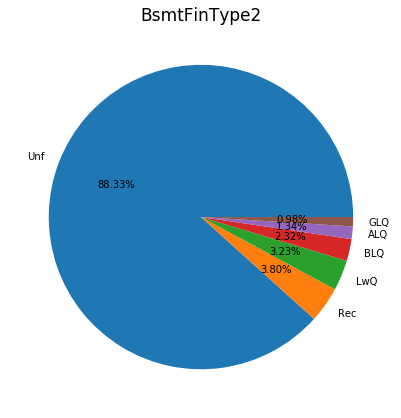

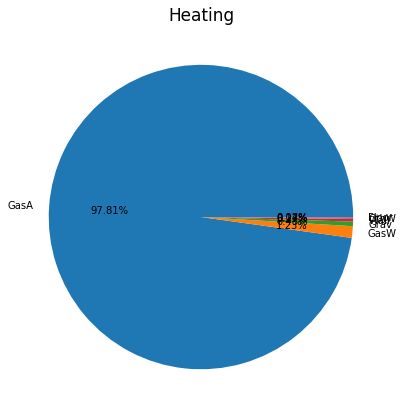

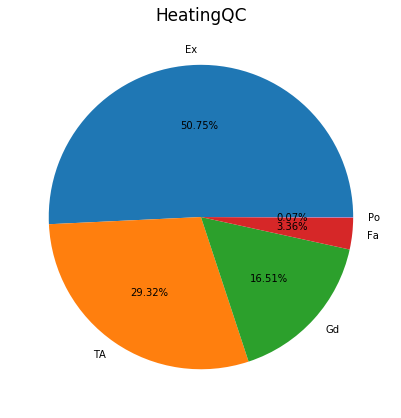

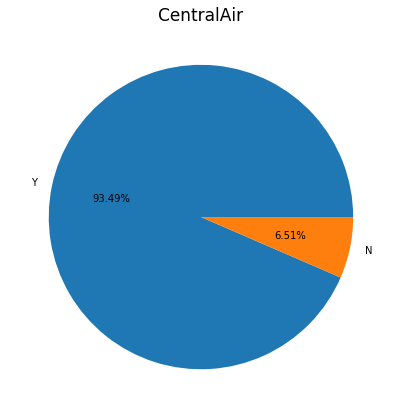

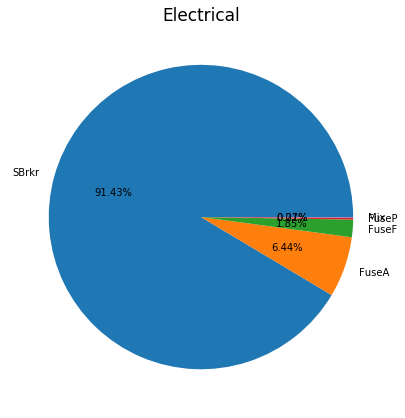

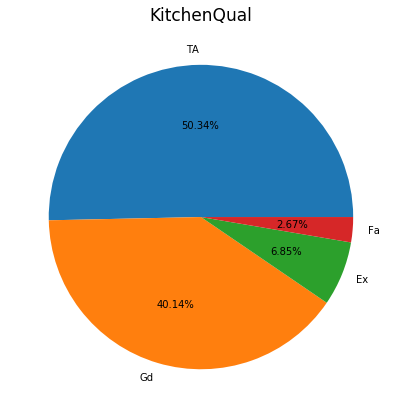

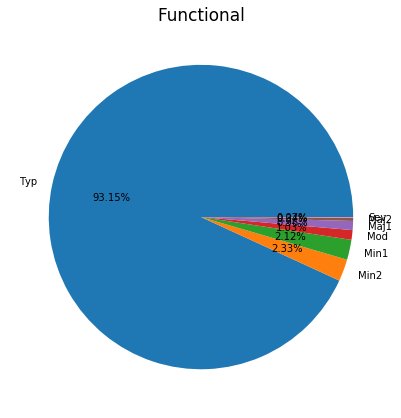

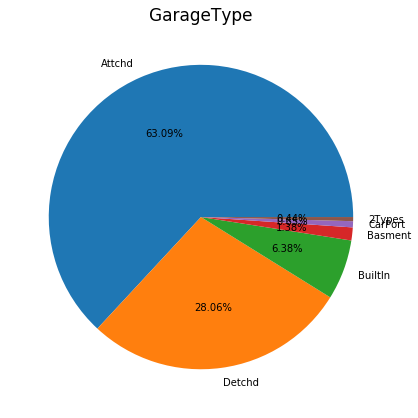

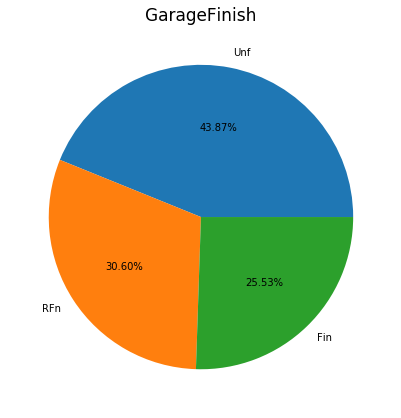

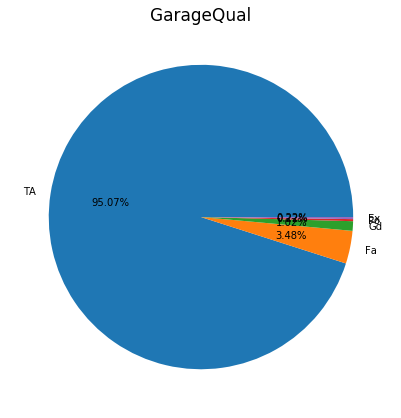

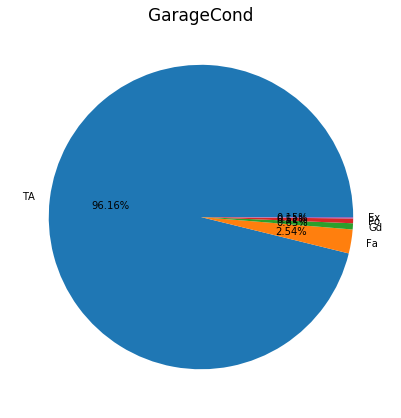

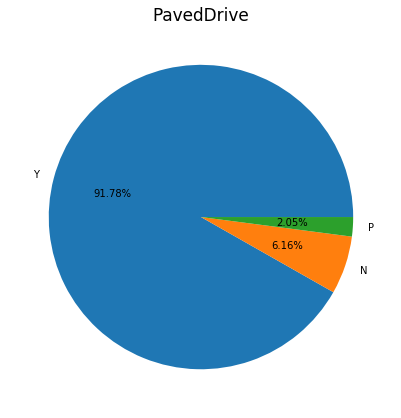

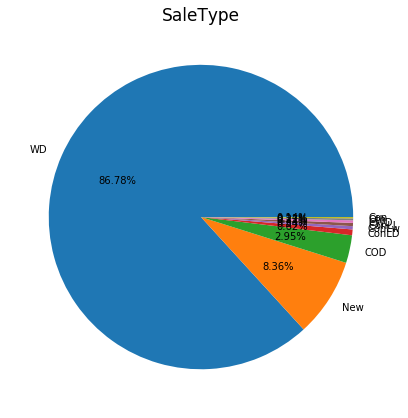

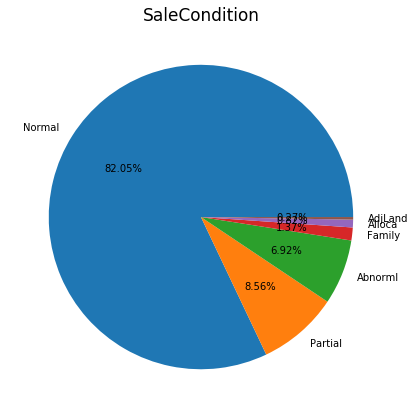

In [301]:
columns = []
for col in list(train_df.select_dtypes(include=['object']).columns):
    result = train_df[col].value_counts()*100/train_df.shape[0]
    if result[0] >= 90:
        columns.append(col)
    data_category = train_df[col].value_counts()
    label = data_category.index.values
    value = data_category.values
    plt.figure(figsize=(7,7))
    plt.title(col, fontsize=17)
    plt.pie(value, labels=label, autopct='%.2f%%')

In [302]:
train_df.drop(columns, axis=1, inplace=True)

In [303]:
train_df.shape

(1460, 65)

In [304]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 no

# Xử lý các bản ghi bị missing dữ liệu

In [305]:
# Duyệt tất cả các cột
for column in train_df.columns:
    # Nếu column có dữ liệu bị missing 
    if train_df[column].isnull().sum()>0:
        # Kiểm tra kiểu dữ liệu của column
        # Nếu kiểu dữ liệu của column là number thì thay dữ liệu missing bằng mean
        if train_df[column].dtype == 'float64' or train_df[column].dtype == 'int64':
            index = 0
            mean = train_df[column].mean()
            for i in train_df[column].isnull().values:
                if i == True:
                    train_df[column][index] = mean
                index += 1
        # Nếu kiểu dữ liệu của column là object thì thay dữ liệu bị missing bằng giá trị xuất hiện nhiều nhất
        elif train_df[column].dtype == 'object':
            index = 0
            mode = train_df[column].mode()[0]
            for i in train_df[column].isnull().values:
                if i == True:
                    train_df[column][index] = mode
                index += 1
        else:
            print("Unsupported Type")

C:\Users\MANHLK\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\MANHLK\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [306]:
train_df.isnull().sum().sort_values(ascending=False)

SalePrice       0
BsmtUnfSF       0
BsmtFinType2    0
BsmtFinSF1      0
BsmtFinType1    0
               ..
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Id              0
Length: 65, dtype: int64

## Xóa trường Id

In [307]:
train_df.drop(["Id"], axis = 1, inplace = True)

# EDA

In [308]:
y_train = train_df["SalePrice"]
train_df.drop(["SalePrice"], axis=1, inplace=True)

# Encoding and Normalization

## Xử lý dữ liệu dạng categorical - đưa về dạng one hot vector

In [309]:
for column in list(train_df.select_dtypes(include=["object"]).columns):
    one_hot_encoder = pd.get_dummies(train_df[column], prefix=column)
    train_df.drop([column], axis=1, inplace=True)
    train_df = train_df.join(one_hot_encoder)

In [310]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## Xử lý dữ liệu dạng numerical - Standardization)

In [311]:
for col in list(train_df.select_dtypes(include=["float64","int64"]).columns):
    mean = train_df[col].mean()
    std = train_df[col].std()
    train_df[col] = train_df[col].apply(lambda x: (x-mean)/std)

In [312]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073350,-0.229293,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.511243,0.575228,-0.288554,...,0,0,0,1,0,0,0,0,1,0
1,-0.872264,0.451781,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.574214,1.171591,-0.288554,...,0,0,0,1,0,0,0,0,1,0
2,0.073350,-0.093078,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322950,0.092875,-0.288554,...,0,0,0,1,0,0,0,0,1,0
3,0.309753,-0.456318,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.574214,-0.499103,-0.288554,...,0,0,0,1,1,0,0,0,0,0
4,0.073350,0.633401,0.375020,1.374324,-0.517023,0.951306,0.733056,1.364102,0.463410,-0.288554,...,0,0,0,1,0,0,0,0,1,0


# Xây dựng model 

In [313]:
import seaborn as sns
import scipy.stats as stats

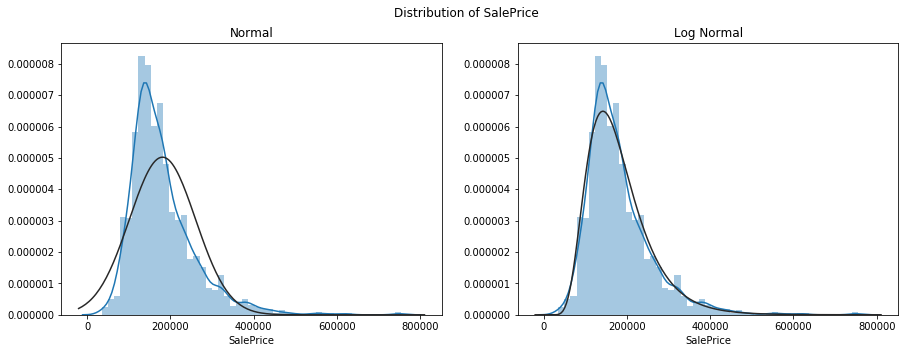

In [335]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Distribution of SalePrice")
axs[0].set_title("Normal")
sns.distplot(y_train, kde=True, hist=True, fit=stats.norm, ax=axs[0])
axs[1].set_title("Log Normal")
sns.distplot(y_train, kde=True, hist=True, fit=stats.lognorm, ax=axs[1])
plt.show()

In [340]:
y = np.log(y_train)

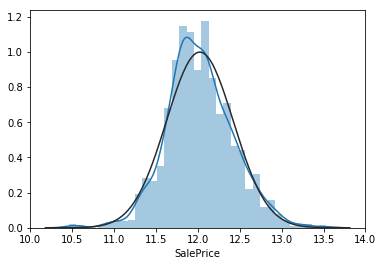

In [341]:
sns.distplot(y, kde=True, hist=True, fit=stats.norm)

## Chia tập dữ liệu huấn luyện

In [342]:
from sklearn.model_selection import train_test_split

In [344]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=0)

## Linear Regression

In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [374]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse

1918741072.3648663

## Ridge Regression

In [382]:
from sklearn.linear_model import Ridge

In [383]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_predict = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.1682124075393477

## Lasso Regression

In [384]:
from sklearn.linear_model import Lasso

In [385]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.3931190553250003

## Decision Tree Regression

In [387]:
from sklearn.tree import DecisionTreeRegressor

In [388]:
DT_reg = DecisionTreeRegressor()
DT_reg.fit(x_train, y_train)
y_predict = DT_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.2077269707898928

## Random Forest

In [389]:
from sklearn.ensemble import RandomForestRegressor

In [391]:
rf_reg = RandomForestRegressor(max_depth=250, random_state=0)
rf_reg.fit(x_train, y_train)
y_predict = rf_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

C:\Users\MANHLK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.14522321024783622

## Support Vector Regression

In [392]:
from sklearn.svm import SVR

In [394]:
svreg = SVR()
svreg.fit(x_train, y_train)
y_predict = svreg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

C:\Users\MANHLK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.12199329812651276